# Meta-Niche

## Calculate surrounding cell component

When considering *niches*, we always say surrounding cellular or molecular component of a target cell. However, focusing on only a single cell would never make sense in reference of any biology process, which prompt us to group cells with similar state and ask what elements may trigger the activate of this target cell group. 

The following tutorial describes a demo example for calculating the surrounding cellular component of our target cell group *c3*, which represents neoblast cells in our paper. In this calculation, we used both distance and count of neighbor cells to infer the main ingredient of local microenvironment.

In [1]:
import pandas as pd
import niche
%matplotlib inline

we have included a demo file for testing, which you can find with name 'demo.txt'. In this file, each line represents a cell with its spatial coordinates **x**, **y** and cell categories **cluster**

In [2]:
df = pd.read_csv('demo.txt', sep='\t', header=0, index_col=0)
df

,x,y,cluster
cell,,,
-23531.WT_25,2353.578947,1708.157895,c34
-23493.WT_25,2642.612903,1682.451613,c9
-23480.WT_25,2546.903226,1683.193548,c23
-23479.WT_25,2827.598726,1668.636943,c3
-23380.WT_25,2364.428571,1671.333333,c6
...,...,...,...
197449.WT_25,23.949495,754.535354,c18
197451.WT_25,22.048077,742.721154,c18
197454.WT_25,18.070796,707.345133,c18


as *niches* function in a local microenvironment, we first find neighbor cells of each neoblast cell (c3 group here) within radius of 15 um, and then relocated each neighbor's coordinates by setting their query c3's coordinates as origin point (0, 0), which reset the location of all c3 cells as a 'meta' representation and only retained neighbors' relative position.

In [3]:
nce = niche.cal_niche(df, group='c3', group_col='cluster', radius=15)
nce

based on these relative positions, we next calculated the spatial density of each type of neighbors, and also estimated how close of each neighbor type to our c3 meta-coordinates.

/home/hankai/CodeSpace/4D-BioReconX/BIO/Meta-Niche/niche.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


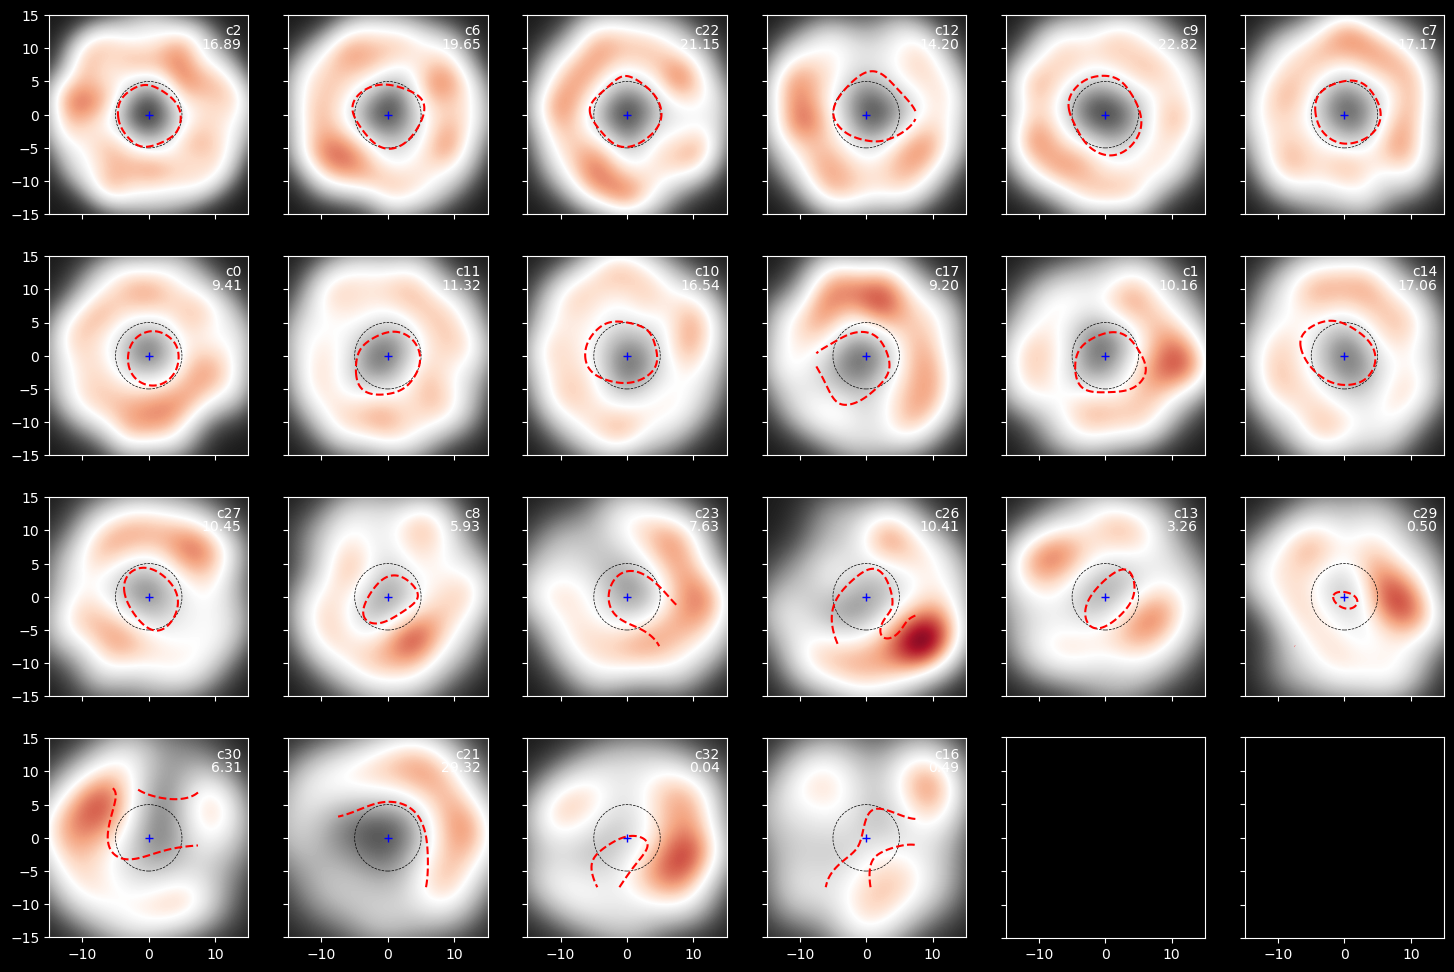

In [5]:
results = niche.cal_2d_density(nce, group_col='cluster', radius=15)

In each axis, the heatmap show the spatial density, with high density in red color. The blue cross in the middle represent the location of the meta-c3 (0, 0). The black-dotted circle represent a baseline with radius of 5 um, while the red-dotted circle represent the contour line with density of 0.001. The type of neighbor and the nearest distance of contour line to the (0, 0) was labeled at the upper-right corner.

In [6]:
results

,group,count,max_dens,nearest_dist
0,c2,2005,0.001833,16.892981
1,c6,865,0.001893,19.650777
2,c22,666,0.001836,21.152721
3,c12,568,0.001858,14.197462
4,c9,550,0.001718,22.821707
5,c7,491,0.001740,17.173243
6,c0,486,0.001809,9.406311
7,c11,375,0.001620,11.316524
8,c10,355,0.001631,16.539270
9,c17,326,0.001978,9.196763


The count of neighbors, as well as maximal density and nearest distance of each neighbor type were included in the final result

## For custom usage

This method should work in any custom situations, but one thing to be aware of is that how your target cell groups distributed in space. Cell groups with scattered and aggregated distribution will be different.

## Further extending

We designed this 'meta'-based calculation as a preliminary steps, here we listed some possible directions as hints for future work and other people.
- 3D space coordinates
- additional conditions for spliting 'meta' into subtype, like region, state
- density polarity to find local response
- integrate with cell-cell communication